# H3 Joins and Plotting
This notebook demonstrates some basic techniques for using the relationship files to generate hex-based plots from an input shapefile.

In [1]:
import sys

import geopandas as gpd

sys.path.append("../src/")
from h3utils import *

# Demo
Read a shapefile

In [2]:
df = gpd.read_file("../data/joins/ejblocks.shp.zip")
df.columns

Index(['GEOID20', 'ALAND20', 'AWATER20', 'HOUSING20', 'POP20', 'osmid_x',
       'tract_osmi', 'land_osmid', 'trip_time', 'RPT_AC', 'CALC_AC',
       'IUCN_STATU', 'CL_UNIQUEI', 'OBJECTID', 'ShapeSTAre', 'ShapeSTLen',
       'osmid_y', 'AC_5', 'AC_10', 'AC_15', 'AC_20', 'AC_30', 'AC_45', 'AC_60',
       'GEOID_grp', 'GEOID_trac', 'GEO_ID', 'P1_001N', 'P1_003N', 'P2_001N',
       'P2_002N', 'state', 'county', 'tract', 'block', 'POPDENSE', 'TC', 'CC',
       'white_per', 'hisp_per', 'white_50', 'hisp_75', 'geometry'],
      dtype='object')

Merge with the h3 tiles

In [3]:
df = h3_merge(df)
df.columns

Index(['h3_fraction', 'ALAND20', 'AWATER20', 'HOUSING20', 'POP20', 'osmid_x',
       'tract_osmi', 'land_osmid', 'trip_time', 'RPT_AC', 'CALC_AC',
       'IUCN_STATU', 'CL_UNIQUEI', 'OBJECTID', 'ShapeSTAre', 'ShapeSTLen',
       'osmid_y', 'AC_5', 'AC_10', 'AC_15', 'AC_20', 'AC_30', 'AC_45', 'AC_60',
       'GEOID_grp', 'GEOID_trac', 'GEO_ID', 'P1_001N', 'P1_003N', 'P2_001N',
       'P2_002N', 'state', 'county', 'tract', 'block', 'POPDENSE', 'TC', 'CC',
       'white_per', 'hisp_per', 'white_50', 'hisp_75', 'geometry'],
      dtype='object')

Find population (P1_001N) per tile

In [4]:
h3_weight(df, "P1_001N")
df.groupby("h3id")["P1_001N"].sum()

Creating h3_P1_001N


h3id
862a30887ffffff    10.0
862a3088fffffff     0.0
862a30897ffffff     6.0
862a3089fffffff    19.0
862a308a7ffffff     0.0
                   ... 
862badd97ffffff     1.0
862badd9fffffff     0.0
862badda7ffffff     0.0
862baddafffffff     0.0
862baddb7ffffff     1.0
Name: P1_001N, Length: 2511, dtype: float64

Plot the population

Interpreting 'P1_001N' as 'h3_P1_001N'


Text(0.5, 1.0, 'Population per Tile')

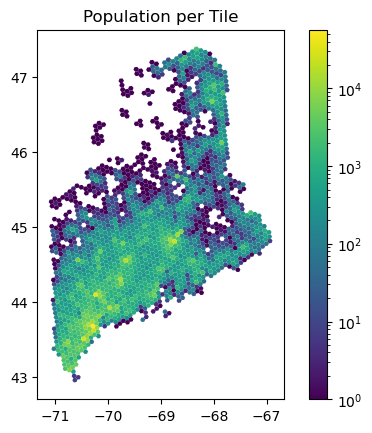

In [5]:
ax = h3_plot(df[df["P1_001N"] > 0], "P1_001N", lognorm=True, legend=True)
ax.set_title("Population per Tile")

Weight a ratio (non-white percentage, 'white_per') by population and tile

In [6]:
h3_weight_pop(df, "P1_003N")
df.groupby("h3id")["white_per"].sum()

Creating h3_P1_003N


h3id
862a30887ffffff    0.300000
862a3088fffffff    0.000000
862a30897ffffff    0.833333
862a3089fffffff    1.133333
862a308a7ffffff    0.000000
                     ...   
862badd97ffffff    1.000000
862badd9fffffff    0.000000
862badda7ffffff    0.000000
862baddafffffff    0.000000
862baddb7ffffff    1.000000
Name: white_per, Length: 2511, dtype: float64

Plot the result

Creating h3_CC
Interpreting 'CC' as 'h3_CC'


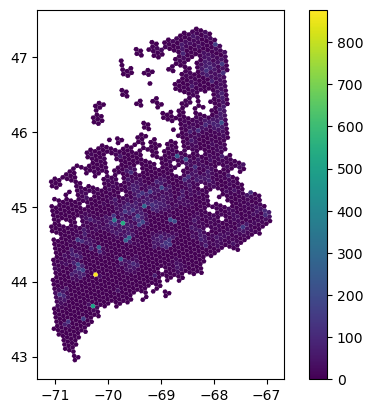

In [7]:
h3_weight(df, "CC")
ax = h3_plot(df[df["P1_001N"] > 0], "CC", lognorm=False, legend=True)